# Book Scraping and Analysis Portfolio Project

## Overview
This project demonstrates web scraping and data visualization skills by collecting, cleaning, and analyzing data from the "Books to Scrape" website. The site is a demo platform designed for web scraping practice, so all data (prices, ratings, etc.) is randomly generated and has no real-world meaning.

## Steps Performed


1. **Scraping Book Data:**
- Titles, star ratings, prices, and links to individual book pages were collected using `requests` and `BeautifulSoup`.
- A `while` loop was used to dynamically iterate through all available pages until no more pages were found.

2. **Extracting Genres:**
- Each book’s genre was retrieved from its detailed page.
- Additional requests were made for each book’s link to collect the genre.
 
3. **Data Analysis:**
- The data was analyzed to answer specific questions such as:
- What are the top 10 most common genres?
- Which genres have the highest number of five-star books?
- What is the relationship between book price and star rating?
 
4. **Data Visualization:**
- Plots were created to visualize the results using `matplotlib` and `seaborn`.

## Implementation

In [32]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

#Step 1: Scrape Basic Book Data
# Initialize variables
books = []  # List to store scraped book data
page = 1  # Start from the first page

# Start scraping process
while True:
    # Construct the URL for the current page
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
   
    # Stop the loop if the page doesn't exist (HTTP status code != 200)
    if response.status_code != 200:
        print(f"No more pages. Stopped at page {page - 1}.")
        break
    
    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find the list of books on the page
    ol = soup.find('ol')  # Locate the ordered list containing books
    articles = ol.find_all('article', class_="product_pod")  # Find all book elements
        
    # Extract data for each book
    for article in articles:
        books.append({
            "Title": article.find('img')['alt'],  # Book title from the 'alt' attribute of the image
            "Star": article.find('p')['class'][1],  # Star rating from the class attribute
            "Price": float(article.find('p', class_='price_color').text[2:]),  # Price (convert string to float)
            "Link": "https://books.toscrape.com/catalogue/"+article.find('a')['href']
        })
        
    # Log progress
    print(f"Page {page} scraped successfully.")
    
    # Move to the next page
    page += 1  

# Create a DataFrame from the scraped data
df = pd.DataFrame(books)

# Display the resulting DataFrame
print(df)

# Uncomment the following line to save the data to a CSV file for future use
# df.to_csv('books_data.csv', index=False)

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.
Page 21 scraped successfully.
Page 22 scraped successfully.
Page 23 scraped successfully.
Page 24 scraped successfully.
Page 25 scraped successfully.
Page 26 scraped successfully.
Page 27 scraped successfully.
Page 28 scraped successfully.
Page 29 scraped successfully.
Page 30 scraped successfully.
Page 31 scraped successfully.
Page 32 scraped successfully.
Page 33 scraped successfully.
Page 34 scraped suc

In [33]:
# Step 2: Extract genres from the collected links
for book in books:
    link = book["Link"]
    response = requests.get(link)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        genre = soup.find('ul', class_='breadcrumb').find_all('a')[2].text
        book["Genre"] = genre
    else:
        book["Genre"] = None  # Handle failed requests
    
# Save the final data with genres to a DataFrame
df = pd.DataFrame(books)
print(df.head())  # Preview the final data with genres

# Save to a CSV file (optional)
# df.to_csv('books_with_genres.csv', index=False)

                                   Title   Star  Price  \
0                   A Light in the Attic  Three  51.77   
1                     Tipping the Velvet    One  53.74   
2                             Soumission    One  50.10   
3                          Sharp Objects   Four  47.82   
4  Sapiens: A Brief History of Humankind   Five  54.23   

                                                Link               Genre  
0  https://books.toscrape.com/catalogue/a-light-i...              Poetry  
1  https://books.toscrape.com/catalogue/tipping-t...  Historical Fiction  
2  https://books.toscrape.com/catalogue/soumissio...             Fiction  
3  https://books.toscrape.com/catalogue/sharp-obj...             Mystery  
4  https://books.toscrape.com/catalogue/sapiens-a...             History  


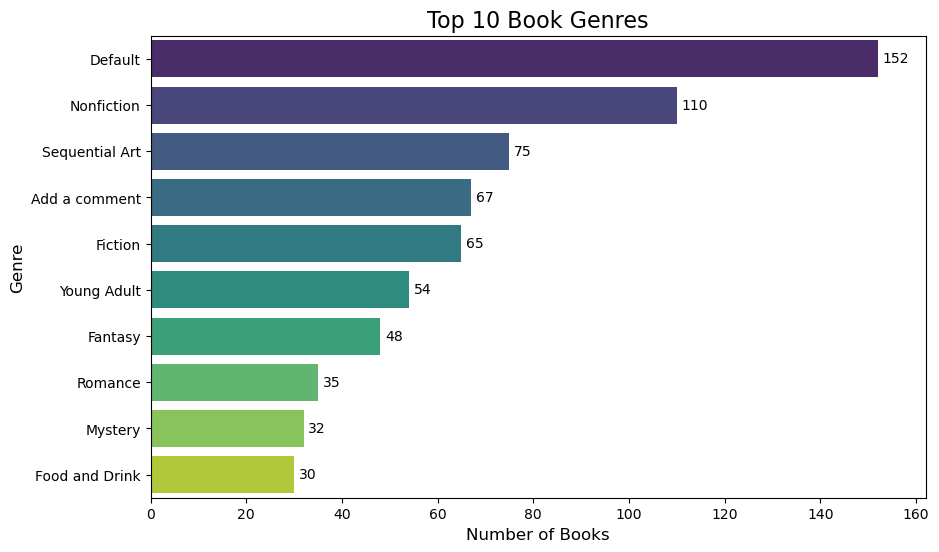

In [63]:
# Step 3: Top 10 Genres

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrence of each genre
genre_counts = df['Genre'].value_counts()

# Get the Top 10 genres
top_genres = genre_counts.head(10)

# Plot the Top 10 genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

# Add annotations for each bar
for i, value in enumerate(top_genres.values):
    ax.text(value + 1, i, str(value), color='black', va='center', fontsize=10)

# Customize the plot
plt.title('Top 10 Book Genres', fontsize=16)
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, top_genres.values.max() + 10)  # Add some space for annotations
plt.show()


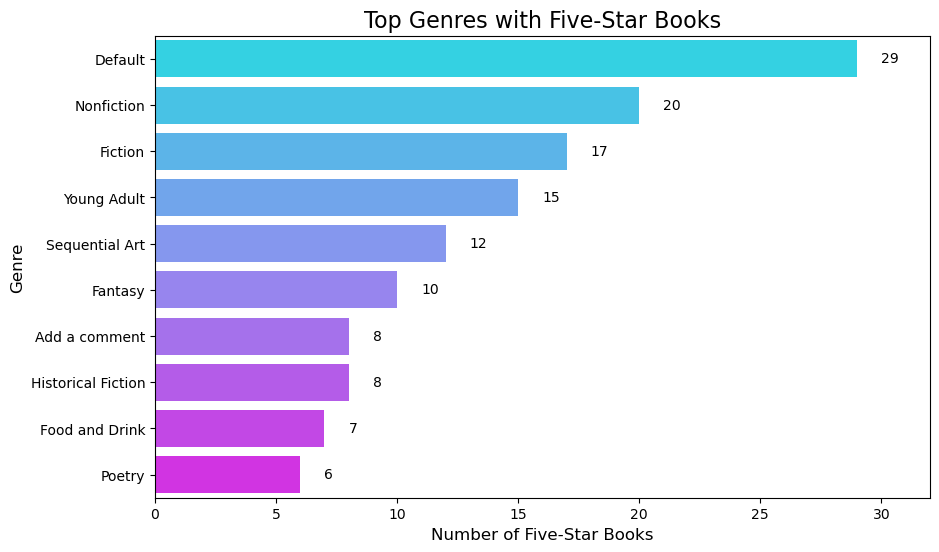

In [59]:
# Step 4: Highest Rated Genres

highest_rated_genres = df[df['Star'] == 'Five']['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=highest_rated_genres.values, y=highest_rated_genres.index, palette="cool")

# Add annotations for each bar
for i, value in enumerate(highest_rated_genres.values):
    ax.text(value + 1, i, str(value), color='black', va='center', fontsize=10)
    
plt.title('Top Genres with Five-Star Books', fontsize=16)
plt.xlabel('Number of Five-Star Books', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, highest_rated_genres.values.max() + 3)  # Add some space for annotations
plt.show()

C:\Users\potap\AppData\Local\Temp\ipykernel_9748\2947272618.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Star', y='Price', jitter=True, palette="husl", alpha=0.7)


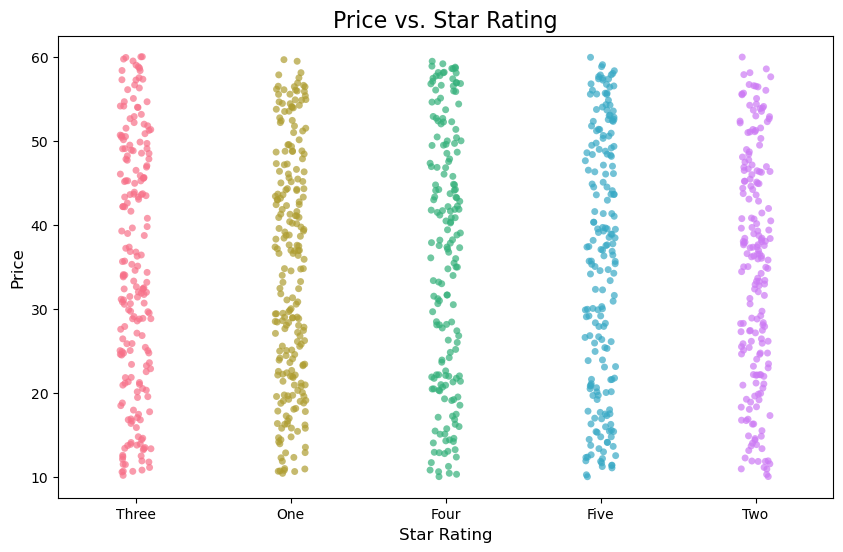

In [62]:
# Step 5: Price vs. Star Rating

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Star', y='Price', jitter=True, palette="husl", alpha=0.7)
plt.title('Price vs. Star Rating', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

## Notes

- The data used in this project comes from a demo website designed for web scraping practice.
- Prices, ratings, and genres are randomly assigned and do not reflect real-world information.
- This project serves as a demonstration of web scraping, data cleaning, and visualization techniques.